### Classification Metrics
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- F1 = 2PR / (P + R)
- False Positive Rate: FPR = FP / (TN + FP)
- True Positive Rate: TPR = TP / (TP + FN)
- AUC
- log loss
- confusion matrix

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# code example
from sklearn import metrics

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [2]:
metrics.accuracy_score(y_true, y_pred)

0.85

In [4]:
metrics.precision_score(y_true, y_pred)

0.5

In [5]:
metrics.recall_score(y_true, y_pred)

0.6666666666666666

In [6]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

#### ROC and AUC

In [22]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

y_score = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99] # predicted probabilities

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)

In [24]:
# false positive rate
fpr

array([0. , 0. , 0. , 0.1, 0.1, 0.3, 0.6, 0.7, 1. ])

In [25]:
# true positive rate
tpr

array([0. , 0.2, 0.4, 0.4, 0.8, 0.8, 0.8, 1. , 1. ])

In [26]:
thresholds

array([ inf, 0.99, 0.9 , 0.85, 0.66, 0.5 , 0.3 , 0.2 , 0.05])

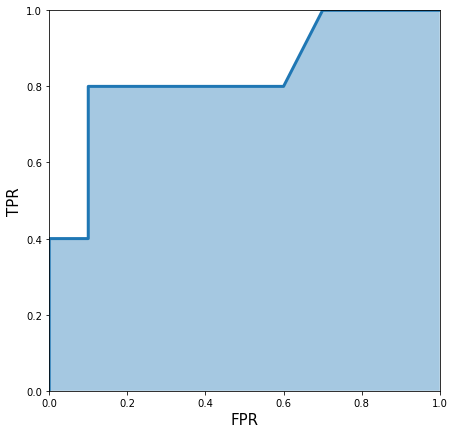

In [27]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr, tpr, alpha=0.4)
plt.plot(fpr, tpr, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is called the Receiver Operating Characteristic (ROC) Curve. The area under the curve is known as the Area Under ROC Curve (AUC).

In [28]:
metrics.roc_auc_score(y_true, y_score)

0.8300000000000001

In [29]:
# log loss
metrics.log_loss(y_true, y_score)

0.49882711861432294

#### multi-class problems

In [30]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [31]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

In [33]:
metrics.f1_score(y_true, y_pred, average="macro")

0.38095238095238093

In [34]:
metrics.f1_score(y_true, y_pred, average="micro")

0.4444444444444444

#### confusion matrix

In [37]:
cm = metrics.confusion_matrix(y_true, y_pred)
cm

array([[3, 0, 0],
       [0, 0, 2],
       [1, 2, 1]])

Text(0.5, 50.5, 'Predicted Labels')

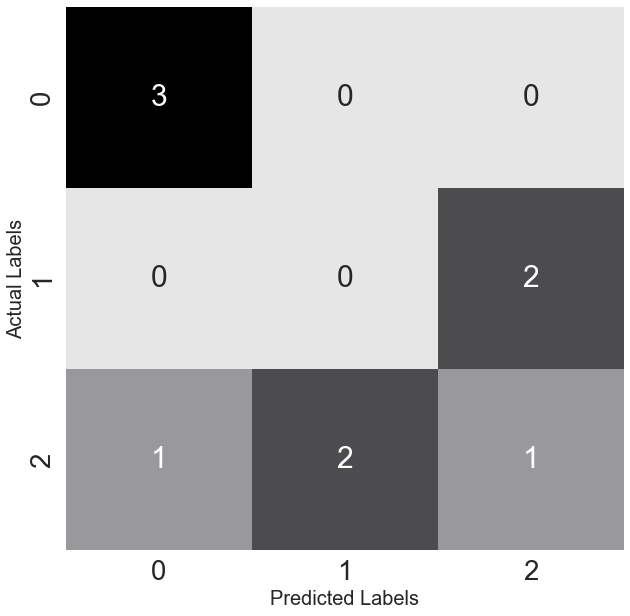

In [39]:
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)